# Time Series EDA with Krish Naik Day 1

* Pandas Data Reader
* Data Time Index
* Time Resampling
* Time Shifts
* Mean Rolling and Expanding
* Time Series Visualization
* Sample Project on Time Series

In [1]:
## Install Pandas Data Reader
!pip install pandas-datareader

In [2]:
## import neccesary libraries
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as pdr_data
from datetime import datetime

In [3]:
!pip install yfinance

In [4]:
import yfinance as yfin

In [5]:
yfin.pdr_override()

In [6]:
df=yfin.Ticker('TSLA')

In [7]:
df.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. It operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, a

In [8]:
data=df.history(period='60mo')

In [9]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-21 00:00:00-05:00,21.160000,21.564667,20.829332,21.318001,120252000,0.0,0.0
2018-12-24 00:00:00-05:00,20.900000,20.966667,19.680000,19.692667,83398500,0.0,0.0
2018-12-26 00:00:00-05:00,20.000000,21.798000,19.606001,21.739332,122446500,0.0,0.0
2018-12-27 00:00:00-05:00,21.322666,21.478001,20.100000,21.075333,128626500,0.0,0.0
2018-12-28 00:00:00-05:00,21.540001,22.416000,21.227333,22.257999,149085000,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-14 00:00:00-05:00,241.220001,253.880005,240.789993,251.050003,160829200,0.0,0.0
2023-12-15 00:00:00-05:00,251.210007,254.130005,248.300003,253.500000,135720800,0.0,0.0
2023-12-18 00:00:00-05:00,253.779999,258.739990,251.360001,252.080002,116416500,0.0,0.0


In [10]:
data.shape

(1258, 7)

In [11]:
data.size

8806

<Axes: xlabel='Date'>

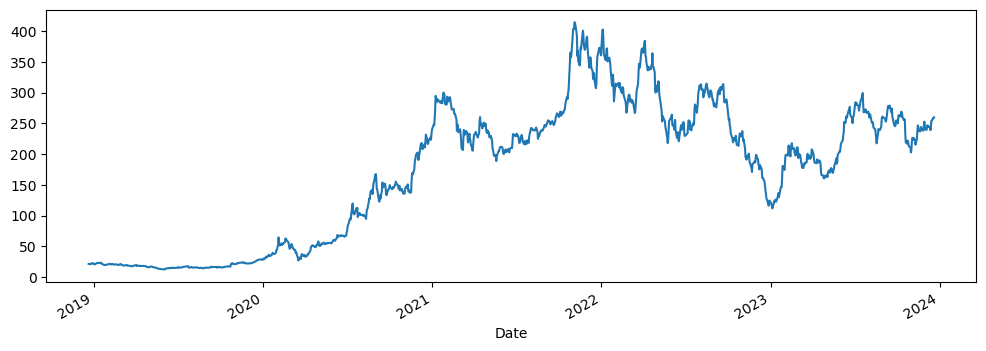

In [12]:
data['High'].plot(figsize=(12,4))

In [13]:
import pandas as pd
df=pd.DataFrame(data=data)

<Axes: xlabel='Date'>

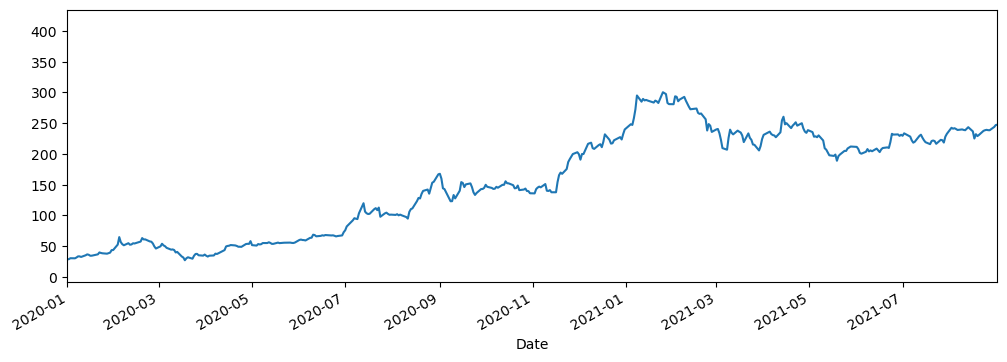

In [14]:

## Setting Limits
df['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

<Axes: xlabel='Date'>

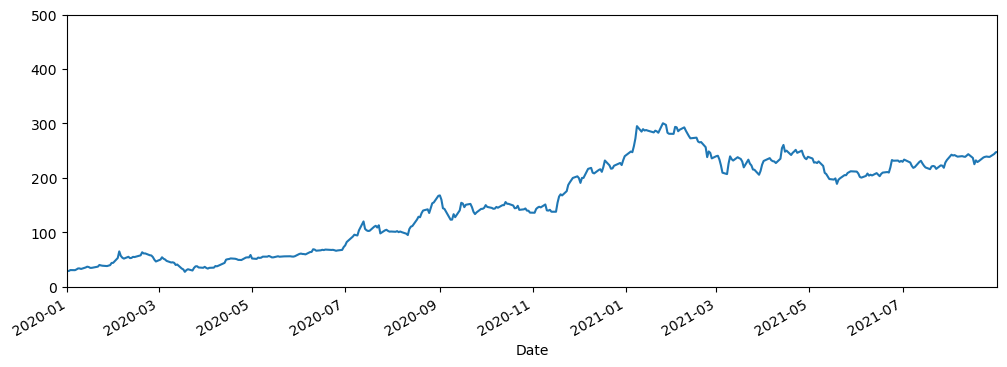

In [15]:
df['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,500],figsize=(12,4))

<Axes: xlabel='Date'>

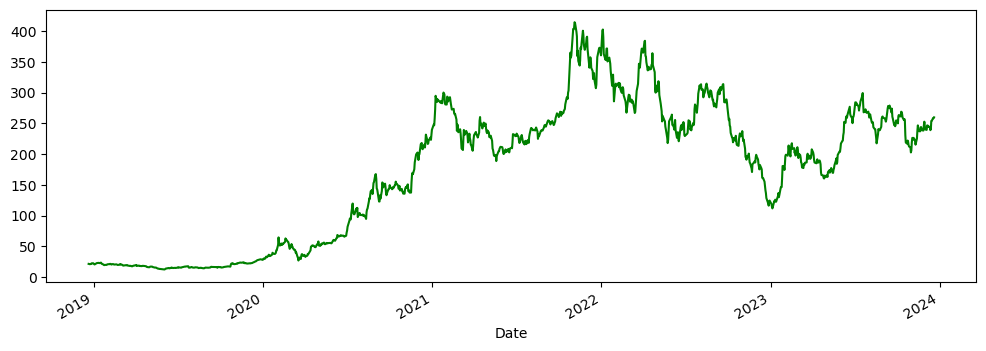

In [16]:
## To apply colors
df['High'].plot(figsize=(12,4),c='green')

<Axes: xlabel='Date'>

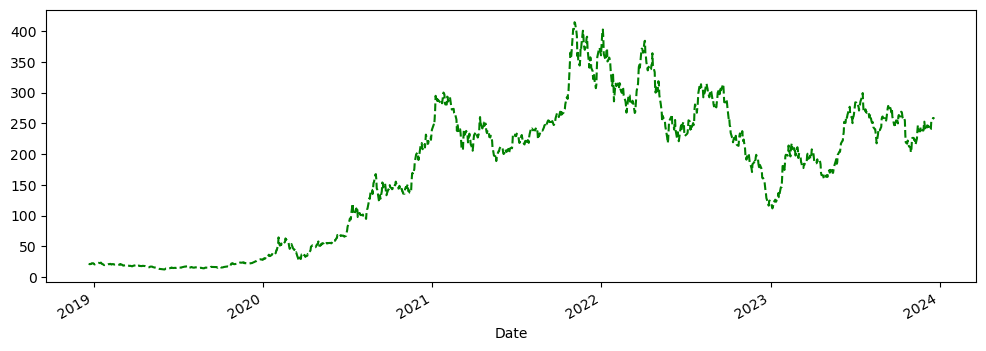

In [17]:
## To change linestyle
df['High'].plot(figsize=(12,4),c='green',ls='--')

In [18]:
df.index

DatetimeIndex(['2018-12-21 00:00:00-05:00', '2018-12-24 00:00:00-05:00',
               '2018-12-26 00:00:00-05:00', '2018-12-27 00:00:00-05:00',
               '2018-12-28 00:00:00-05:00', '2018-12-31 00:00:00-05:00',
               '2019-01-02 00:00:00-05:00', '2019-01-03 00:00:00-05:00',
               '2019-01-04 00:00:00-05:00', '2019-01-07 00:00:00-05:00',
               ...
               '2023-12-07 00:00:00-05:00', '2023-12-08 00:00:00-05:00',
               '2023-12-11 00:00:00-05:00', '2023-12-12 00:00:00-05:00',
               '2023-12-13 00:00:00-05:00', '2023-12-14 00:00:00-05:00',
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1258, freq=None)

In [19]:
## to read first 4 rows
df.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-21 00:00:00-05:00,21.160000,21.564667,20.829332,21.318001,120252000,0.0,0.0
2018-12-24 00:00:00-05:00,20.900000,20.966667,19.680000,19.692667,83398500,0.0,0.0
2018-12-26 00:00:00-05:00,20.000000,21.798000,19.606001,21.739332,122446500,0.0,0.0
2018-12-27 00:00:00-05:00,21.322666,21.478001,20.100000,21.075333,128626500,0.0,0.0


In [20]:
## to read data from a specific range of dates
df[4:7]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-28 00:00:00-05:00,21.540001,22.416000,21.227333,22.257999,149085000,0.0,0.0
2018-12-31 00:00:00-05:00,22.519333,22.614000,21.684000,22.186666,94534500,0.0,0.0
2019-01-02 00:00:00-05:00,20.406668,21.008667,19.920000,20.674667,174879000,0.0,0.0


In [21]:
## To read specific data from dates
df.loc['2020-01-01':'2021-09-01']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500,0.0,0.0
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,266677500,0.0,0.0
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,151995000,0.0,0.0
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,268231500,0.0,0.0
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,467164500,0.0,0.0
...,...,...,...,...,...,...,...
2021-08-26 00:00:00-04:00,236.103333,238.466660,232.539993,233.720001,39642900,0.0,0.0
2021-08-27 00:00:00-04:00,235.000000,238.333328,234.033340,237.306671,41501400,0.0,0.0
2021-08-30 00:00:00-04:00,238.240005,243.666672,237.576660,243.636673,55812600,0.0,0.0


In [22]:
## To get the 'Open' data along with the specific dates
share_open=df.loc['2020-01-01':'2021-09-01']['Open']

In [23]:
share_open

Date
2020-01-02 00:00:00-05:00     28.299999
2020-01-03 00:00:00-05:00     29.366667
2020-01-06 00:00:00-05:00     29.364668
2020-01-07 00:00:00-05:00     30.760000
2020-01-08 00:00:00-05:00     31.580000
                                ...    
2021-08-26 00:00:00-04:00    236.103333
2021-08-27 00:00:00-04:00    235.000000
2021-08-30 00:00:00-04:00    238.240005
2021-08-31 00:00:00-04:00    244.333328
2021-09-01 00:00:00-04:00    244.693329
Name: Open, Length: 421, dtype: float64

In [24]:
## to get the index from the data
index=df.loc['2020-01-01':'2021-09-01'].index

In [25]:
index

DatetimeIndex(['2020-01-02 00:00:00-05:00', '2020-01-03 00:00:00-05:00',
               '2020-01-06 00:00:00-05:00', '2020-01-07 00:00:00-05:00',
               '2020-01-08 00:00:00-05:00', '2020-01-09 00:00:00-05:00',
               '2020-01-10 00:00:00-05:00', '2020-01-13 00:00:00-05:00',
               '2020-01-14 00:00:00-05:00', '2020-01-15 00:00:00-05:00',
               ...
               '2021-08-19 00:00:00-04:00', '2021-08-20 00:00:00-04:00',
               '2021-08-23 00:00:00-04:00', '2021-08-24 00:00:00-04:00',
               '2021-08-25 00:00:00-04:00', '2021-08-26 00:00:00-04:00',
               '2021-08-27 00:00:00-04:00', '2021-08-30 00:00:00-04:00',
               '2021-08-31 00:00:00-04:00', '2021-09-01 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=421, freq=None)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

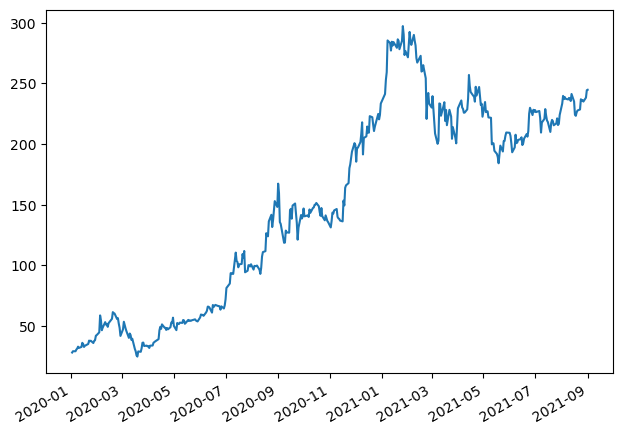

In [27]:
## To Create Subplots
figure,axis=plt.subplots()
plt.tight_layout()

## preventing Overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

### DateTime Index

In [28]:
df.reset_index()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-12-21 00:00:00-05:00,21.160000,21.564667,20.829332,21.318001,120252000,0.0,0.0
1,2018-12-24 00:00:00-05:00,20.900000,20.966667,19.680000,19.692667,83398500,0.0,0.0
2,2018-12-26 00:00:00-05:00,20.000000,21.798000,19.606001,21.739332,122446500,0.0,0.0
3,2018-12-27 00:00:00-05:00,21.322666,21.478001,20.100000,21.075333,128626500,0.0,0.0
4,2018-12-28 00:00:00-05:00,21.540001,22.416000,21.227333,22.257999,149085000,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2023-12-14 00:00:00-05:00,241.220001,253.880005,240.789993,251.050003,160829200,0.0,0.0
1254,2023-12-15 00:00:00-05:00,251.210007,254.130005,248.300003,253.500000,135720800,0.0,0.0
1255,2023-12-18 00:00:00-05:00,253.779999,258.739990,251.360001,252.080002,116416500,0.0,0.0
1256,2023-12-19 00:00:00-05:00,253.479996,258.339996,253.009995,257.220001,106737400,0.0,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-12-21 00:00:00-05:00 to 2023-12-20 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 110.9 KB


In [30]:
df.index

DatetimeIndex(['2018-12-21 00:00:00-05:00', '2018-12-24 00:00:00-05:00',
               '2018-12-26 00:00:00-05:00', '2018-12-27 00:00:00-05:00',
               '2018-12-28 00:00:00-05:00', '2018-12-31 00:00:00-05:00',
               '2019-01-02 00:00:00-05:00', '2019-01-03 00:00:00-05:00',
               '2019-01-04 00:00:00-05:00', '2019-01-07 00:00:00-05:00',
               ...
               '2023-12-07 00:00:00-05:00', '2023-12-08 00:00:00-05:00',
               '2023-12-11 00:00:00-05:00', '2023-12-12 00:00:00-05:00',
               '2023-12-13 00:00:00-05:00', '2023-12-14 00:00:00-05:00',
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1258, freq=None)

In [31]:
Date=pd.DataFrame(data=df.index, columns=['Date'])

In [32]:
df.reset_index(drop=True, inplace=True)

In [33]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,21.160000,21.564667,20.829332,21.318001,120252000,0.0,0.0
1,20.900000,20.966667,19.680000,19.692667,83398500,0.0,0.0
2,20.000000,21.798000,19.606001,21.739332,122446500,0.0,0.0
3,21.322666,21.478001,20.100000,21.075333,128626500,0.0,0.0
4,21.540001,22.416000,21.227333,22.257999,149085000,0.0,0.0


In [34]:
df['Date']=Date

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Open          1258 non-null   float64                         
 1   High          1258 non-null   float64                         
 2   Low           1258 non-null   float64                         
 3   Close         1258 non-null   float64                         
 4   Volume        1258 non-null   int64                           
 5   Dividends     1258 non-null   float64                         
 6   Stock Splits  1258 non-null   float64                         
 7   Date          1258 non-null   datetime64[ns, America/New_York]
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 78.8 KB


In [36]:
# exploring datetime
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [37]:
datetime.now()

datetime.datetime(2023, 12, 21, 18, 43, 56, 454917)

In [38]:
datetime.now()

datetime.datetime(2023, 12, 21, 18, 43, 56, 512916)

In [39]:
def add_nums(num1,num2):
    return num1+num2

In [40]:
## UseCase: To measure the time taken by a function to give results
start_time=datetime.now()
num1=12
num2=94
add_nums(num1,num2)
end_time=datetime.now()
print(end_time-start_time)

0:00:00


In [41]:
datetime(2021,11,21).date()

datetime.date(2021, 11, 21)

In [42]:
datetime(2021,11,21).day

21

In [43]:
datetime(2021,11,21).weekday()

6

In [44]:
datetime(2021,11,21).year

2021

In [45]:
datetime(2021,11,21).month

11

### Time Resampling

In [46]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,21.160000,21.564667,20.829332,21.318001,120252000,0.0,0.0,2018-12-21 00:00:00-05:00
1,20.900000,20.966667,19.680000,19.692667,83398500,0.0,0.0,2018-12-24 00:00:00-05:00
2,20.000000,21.798000,19.606001,21.739332,122446500,0.0,0.0,2018-12-26 00:00:00-05:00
3,21.322666,21.478001,20.100000,21.075333,128626500,0.0,0.0,2018-12-27 00:00:00-05:00
4,21.540001,22.416000,21.227333,22.257999,149085000,0.0,0.0,2018-12-28 00:00:00-05:00


In [51]:
## To set date column as index again
df.set_index('Date', inplace=True)

In [52]:
df.resample(rule='A').min()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-31 00:00:00-05:00,20.000000,20.966667,19.606001,19.692667,83398500,0.0,0.0
2019-12-31 00:00:00-05:00,12.073333,12.445333,11.799333,11.931333,36984000,0.0,0.0
2020-12-31 00:00:00-05:00,24.980000,26.990667,23.367332,24.081333,52073100,0.0,0.0
2021-12-31 00:00:00-05:00,184.183334,188.736664,179.830002,187.666672,29401800,0.0,0.0
2022-12-31 00:00:00-05:00,110.349998,116.269997,108.239998,109.099998,41864700,0.0,0.0
2023-12-31 00:00:00-05:00,103.000000,111.750000,101.809998,108.099998,65125200,0.0,0.0


In [54]:
df.resample(rule='A').max()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-31 00:00:00-05:00,22.519333,22.614000,21.684000,22.257999,149085000,0.0,0.0
2019-12-31 00:00:00-05:00,29.000000,29.020666,28.423332,28.729334,450091500,0.0,0.0
2020-12-31 00:00:00-05:00,233.330002,239.573334,230.373337,235.223328,914082000,0.0,5.0
2021-12-31 00:00:00-05:00,411.470001,414.496674,405.666656,409.970001,268189500,0.0,0.0
2022-12-31 00:00:00-05:00,396.516663,402.666656,378.679993,399.926666,221923300,0.0,3.0
2023-12-31 00:00:00-05:00,296.040009,299.290009,289.519989,293.339996,306590600,0.0,0.0


<Axes: xlabel='Date'>

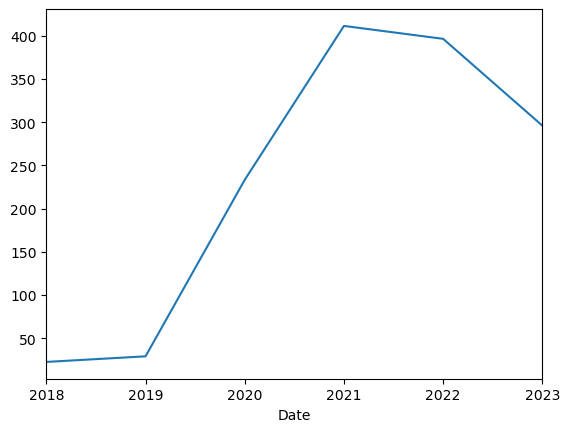

In [56]:
## plotting the above data
df.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

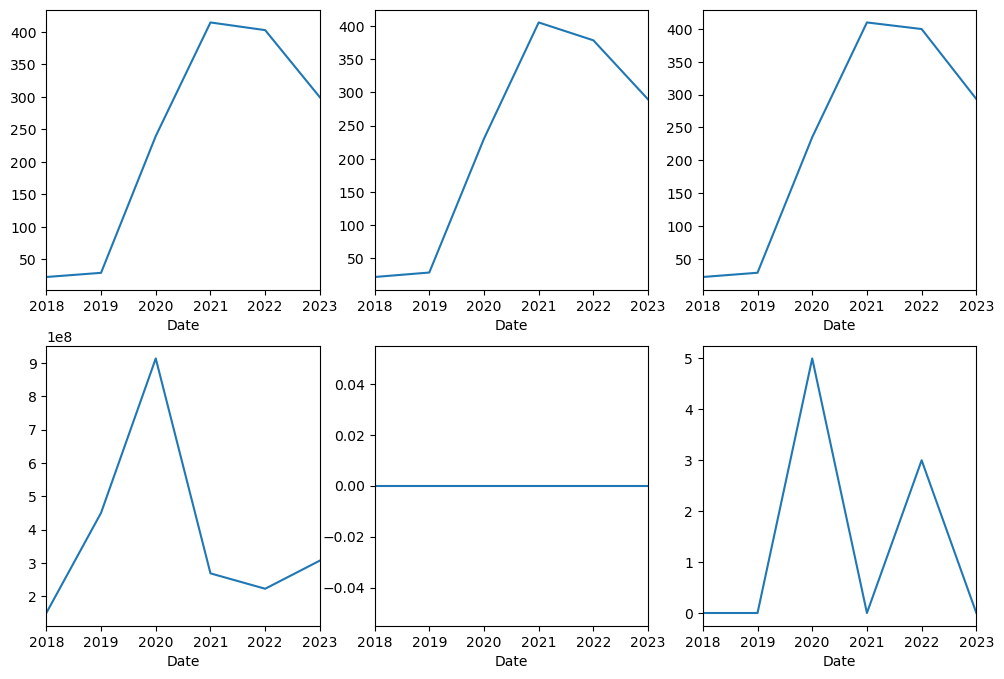

In [70]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

df.resample(rule='A').max()['High'].plot(ax=axs[0, 0])
df.resample(rule='A').max()['Low'].plot(ax=axs[0, 1])
df.resample(rule='A').max()['Close'].plot(ax=axs[0, 2])
df.resample(rule='A').max()['Volume'].plot(ax=axs[1,0])
df.resample(rule='A').max()['Dividends'].plot(ax=axs[1,1])
df.resample(rule='A').max()['Stock Splits'].plot(ax=axs[1,2])

<Axes: xlabel='Date'>

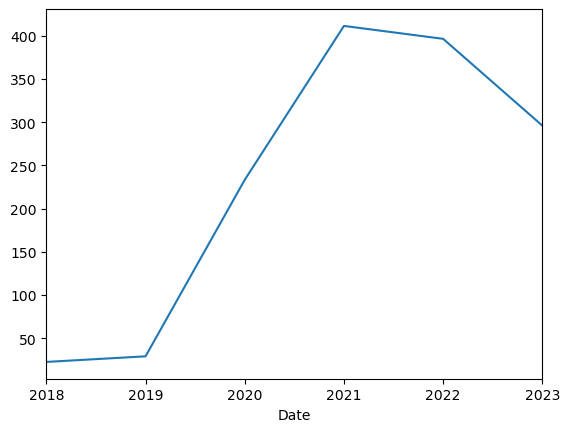

In [73]:
## Plotting with max
df.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

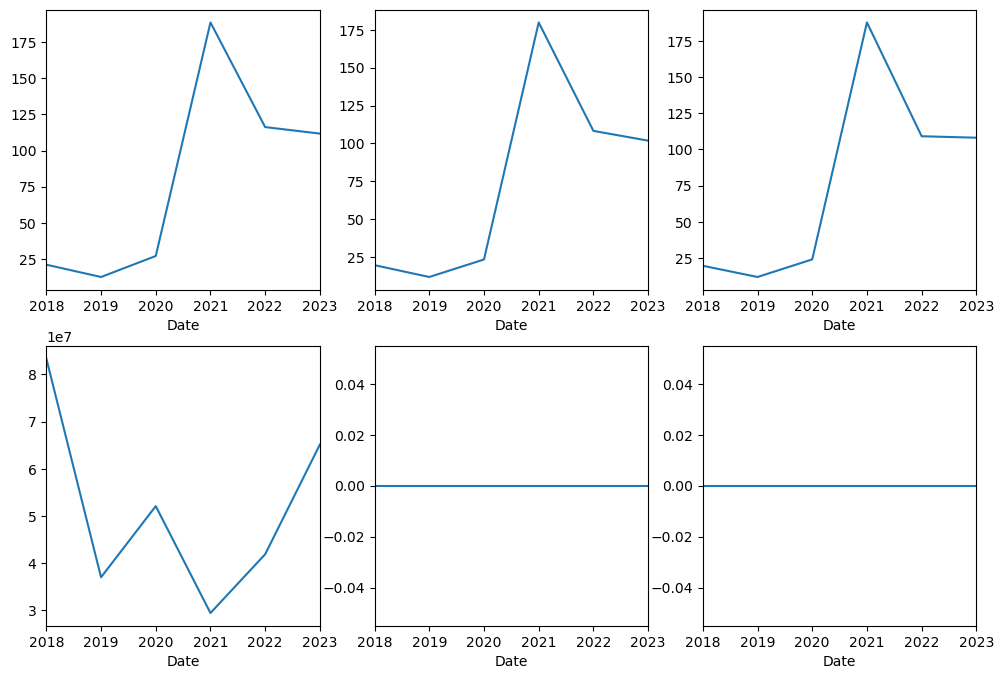

In [71]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

df.resample(rule='A').min()['High'].plot(ax=axs[0, 0])
df.resample(rule='A').min()['Low'].plot(ax=axs[0, 1])
df.resample(rule='A').min()['Close'].plot(ax=axs[0, 2])
df.resample(rule='A').min()['Volume'].plot(ax=axs[1,0])
df.resample(rule='A').min()['Dividends'].plot(ax=axs[1,1])
df.resample(rule='A').min()['Stock Splits'].plot(ax=axs[1,2])

### What does Rule A mean?
It means the year end frequency will be shown
If we want quaterly, use 'QS' instead.

<Axes: xlabel='Date'>

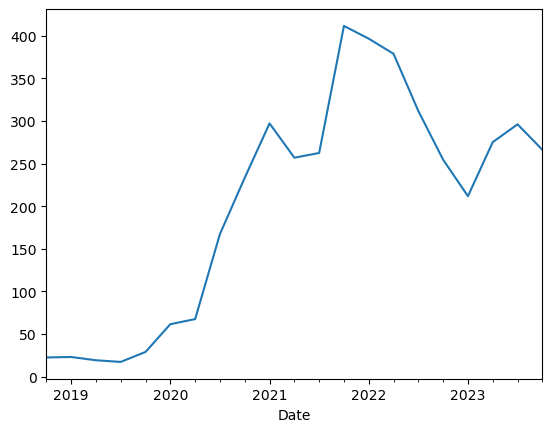

In [75]:
df.resample(rule='QS')['Open'].max().plot()

<Axes: xlabel='Date'>

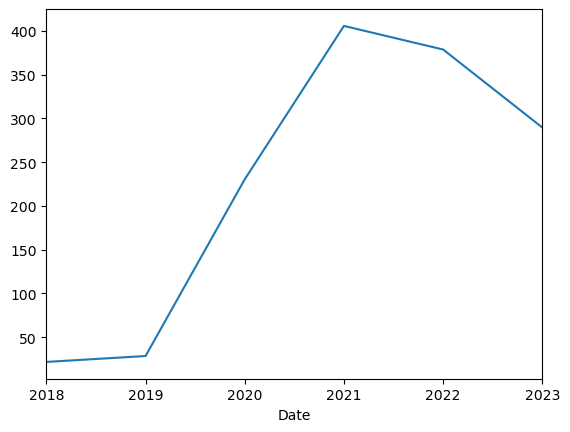

In [77]:
## Business End Frequency
df.resample(rule='BA')['Low'].max().plot()

<Axes: xlabel='Date'>

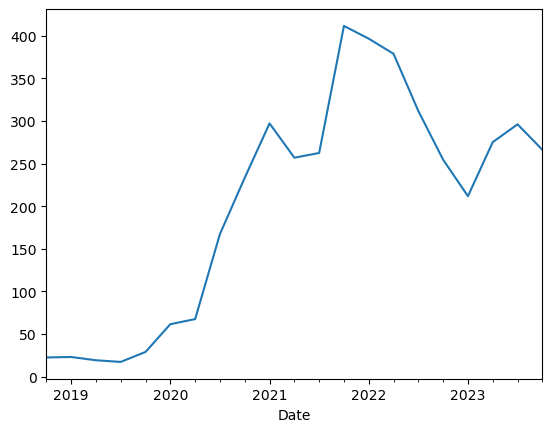

In [78]:
## Business Quaters
df.resample(rule='BQS')['Open'].max().plot()

<Axes: xlabel='Date'>

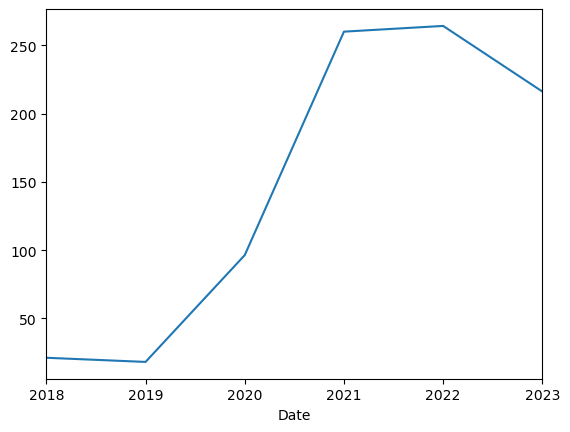

In [79]:
## Plotting
df['Open'].resample(rule='BA').mean().plot()

<Axes: xlabel='Date'>

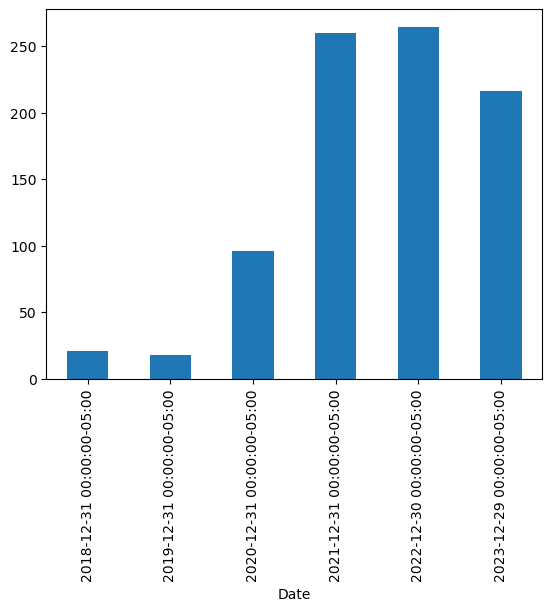

In [81]:
0## Plotting Bar Plot
df['Open'].resample(rule='BA').mean().plot(kind='bar')

<Axes: xlabel='Date'>

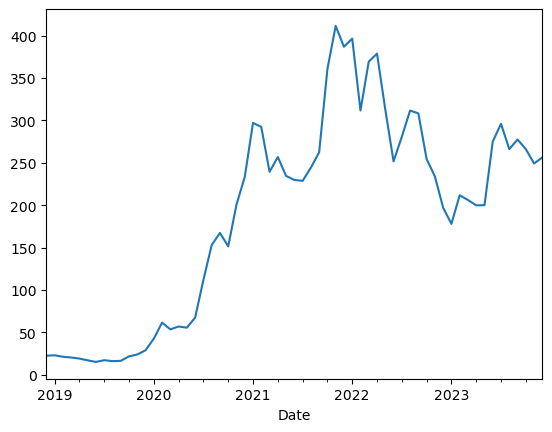

In [83]:
# Monthly data
df['Open'].resample(rule='M').max().plot()

<Axes: xlabel='Date'>

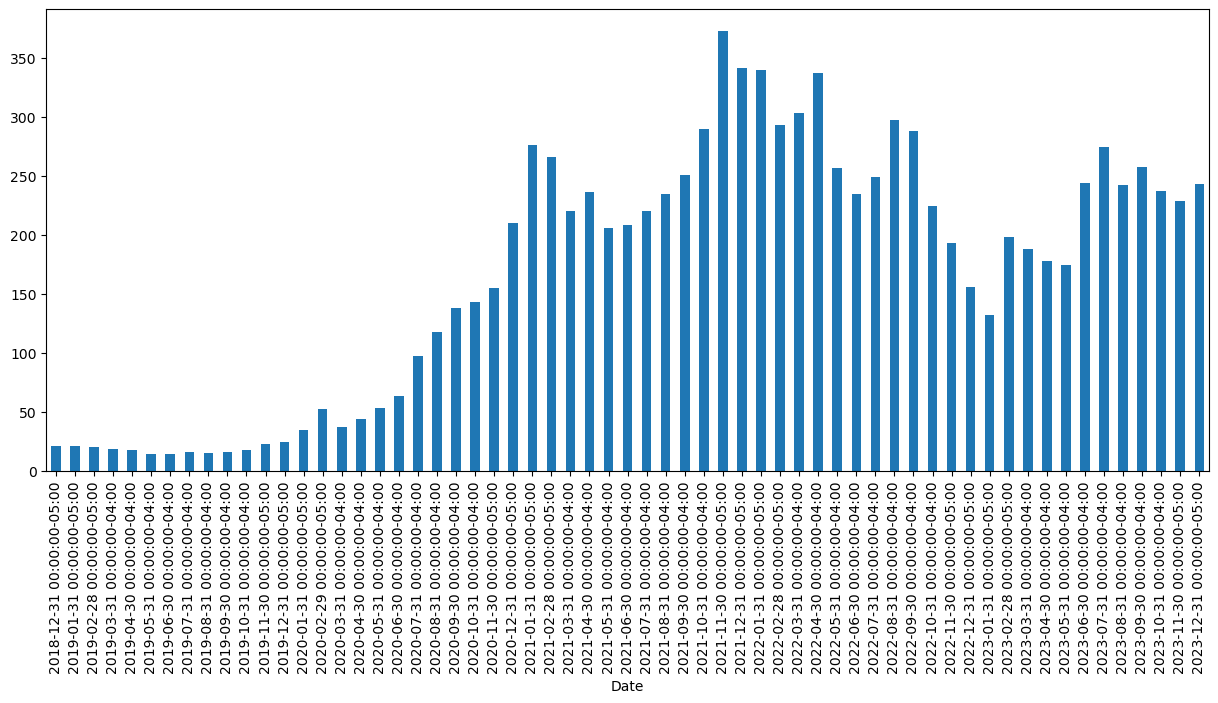

In [86]:
df['Open'].resample(rule='M').mean().plot(kind='bar', figsize=(15,6))

## Rolling and Expanding

In [89]:
df['High'].rolling(window=10).mean().head(15)

Date
2018-12-21 00:00:00-05:00          NaN
2018-12-24 00:00:00-05:00          NaN
2018-12-26 00:00:00-05:00          NaN
2018-12-27 00:00:00-05:00          NaN
2018-12-28 00:00:00-05:00          NaN
2018-12-31 00:00:00-05:00          NaN
2019-01-02 00:00:00-05:00          NaN
2019-01-03 00:00:00-05:00          NaN
2019-01-04 00:00:00-05:00          NaN
2019-01-07 00:00:00-05:00    21.612200
2019-01-08 00:00:00-05:00    21.749134
2019-01-09 00:00:00-05:00    21.942467
2019-01-10 00:00:00-05:00    22.065267
2019-01-11 00:00:00-05:00    22.240200
2019-01-14 00:00:00-05:00    22.281933
Name: High, dtype: float64

In [90]:
df['Open: 30D Rolling']=df['Open'].rolling(30).mean()

In [94]:
df[28:36]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open: 30D Rolling
Date,,,,,,,,
2019-02-04 00:00:00-05:00,20.865334,21.020000,20.125334,20.859333,110281500,0.0,0.0,NaN
2019-02-05 00:00:00-05:00,20.832666,21.496000,20.816668,21.423332,101142000,0.0,0.0,21.095622
2019-02-06 00:00:00-05:00,21.306000,21.615999,21.041332,21.148001,75577500,0.0,0.0,21.100489
2019-02-07 00:00:00-05:00,20.886667,20.980000,20.200001,20.500668,97809000,0.0,0.0,21.100044
2019-02-08 00:00:00-05:00,20.455334,20.496668,19.900000,20.386667,87663000,0.0,0.0,21.115222
2019-02-11 00:00:00-05:00,20.773333,21.240000,20.700001,20.856001,106945500,0.0,0.0,21.096911
2019-02-12 00:00:00-05:00,21.080000,21.212667,20.641333,20.787333,82764000,0.0,0.0,21.081578
2019-02-13 00:00:00-05:00,20.823334,20.850000,20.371332,20.544666,77124000,0.0,0.0,21.025044


<Axes: xlabel='Date'>

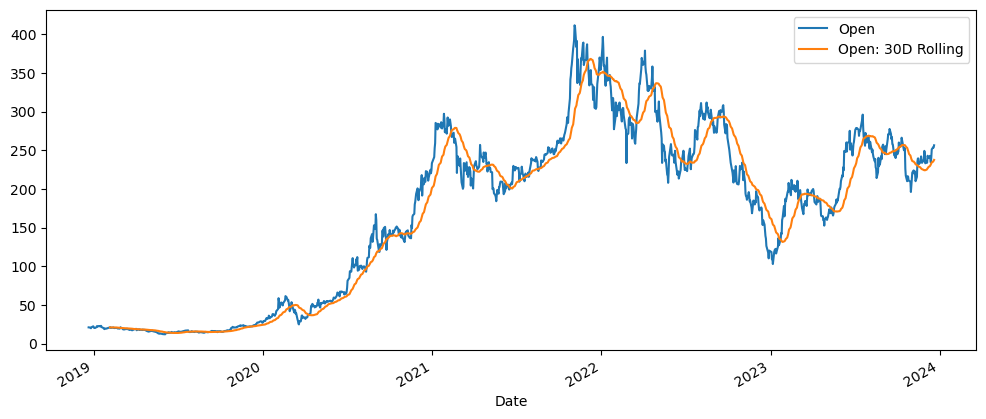

In [96]:
df[['Open','Open: 30D Rolling']].plot(figsize=(12,5))

## Internal Assignment
* Read the Microsoft data using pandas data reader
* Getting maximum price of Share of the year from 2017 to 2021
* The Day on which the price of the stock was highest for last 5 years
* The Day on which the price of the stock was lowest
* Check the news for those dates why the price was high or low


# The End